In [196]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [197]:
V_fs = 3.3
N    = 12
V_lsb = V_fs / (2**N - 1)
V_lsb

0.0008058608058608059

In [198]:
k0 = 1 / V_lsb
m0 = -2048

def z_from_v(v):
    return math.trunc(k0 * v + m0)

In [199]:
z_from_v(2.65)

1240

In [200]:
interval = 1024
noise_ampl = 1e-3
t = np.linspace(0, 2*math.pi, interval)
# Create a 1 Volt rms sine wave with just a little bit of noise added and scale
# it by the ADC k0 factor
v_t = k0 * (math.sqrt(2) * np.sin(32*t) + random.uniform(-noise_ampl, noise_ampl))

In [201]:
# Compute amplitudes in the frequency domain, the fft.rfft function uses
# the conjugate symmetric property of a real valued fft transform and
# computes only the positive frequency components. To get the same amplitude
# scale in frequency and time domains we would need to double the absolute
# values of the positive frequency components 
v_f = np.fft.rfft(v_t)
# v_f should be doubled, scaled down by k0 and finally scaled down from
# rms to amplitude for a correct dBV value
db_offset = 20 * math.log10((2 / k0) / math.sqrt(2))
v_f_db = 20 * np.log10(np.clip(abs(v_f), 1e-9, None) / interval) + db_offset
freqs = np.fft.rfftfreq(interval)

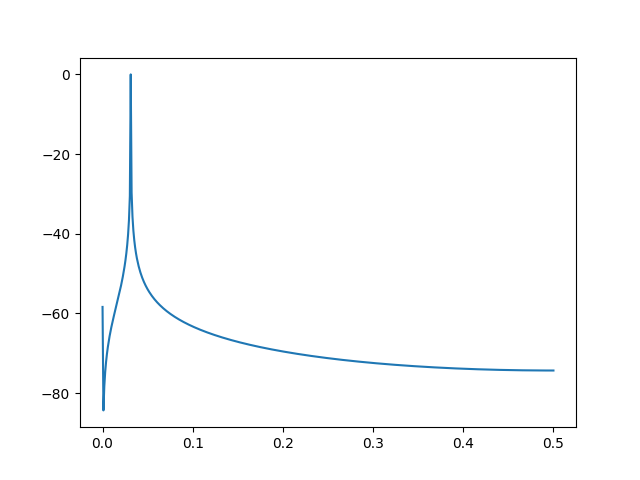

In [202]:
%matplotlib widget

fig1 = plt.figure(1)
plt1 = plt.plot(freqs, v_f_db)

In [203]:
np.max(v_f_db)

-0.01825632292077728

In [204]:
db_offset

-58.864499367731185